### 사이킷런으로 분류하기


In [8]:
import warnings

#불필요한 경고 출력을 방지한다.
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd

In [10]:
# iris 데이터셋
from sklearn.datasets import load_iris

In [11]:
# 데이터셋을 로드한다.
iris = load_iris()

In [12]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
data = iris['data']

In [14]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
# 지도학습 : 분류
target = iris['target']
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# 데이터 프레임에 데이터셋 넣기
df_iris = pd.DataFrame(data,columns=iris.feature_names)

In [18]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df_iris['target']=target

In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

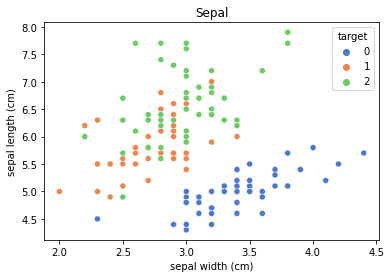

In [22]:
# scatterplot : 산점도 그래프
sns.scatterplot('sepal width (cm)','sepal length (cm)', hue='target', palette="muted", data=df_iris)
plt.title('Sepal')
plt.show()

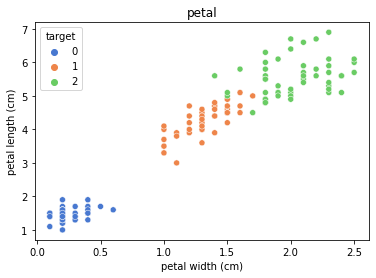

In [23]:
# scatterplot : 산점도 그래프
sns.scatterplot('petal width (cm)','petal length (cm)', hue='target', palette="muted", data=df_iris)
plt.title('petal')
plt.show()

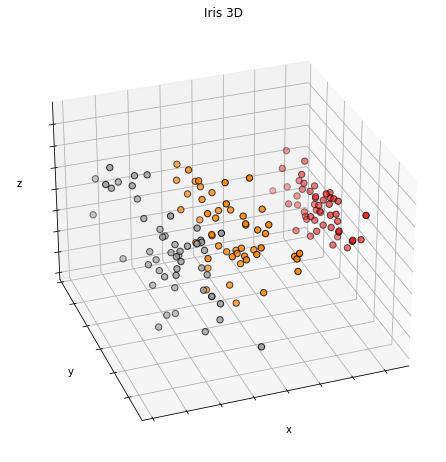

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [25]:
# 학습할 데이터와 테스트 데이터를 나눈다.
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2)

In [27]:
x_train.shape, x_valid.shape

((120, 4), (30, 4))

In [28]:
y_train.shape, y_valid.shape

((120,), (30,))

<AxesSubplot:xlabel='target', ylabel='count'>

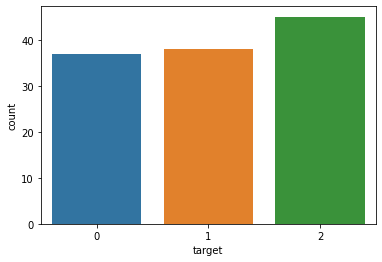

In [29]:
# 0,1,2 class 데이터 불균형이 있는지 확인할 필요가 있다.
sns.countplot(y_train)

In [30]:
# 클래스별 데이터의 분포를 균등하게 배분
# stratify
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2, stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

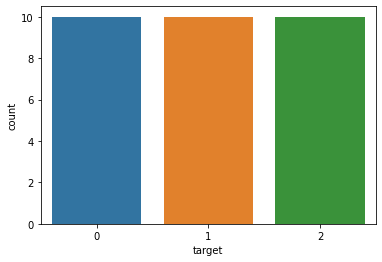

In [31]:
# 0,1,2 class 데이터 불균형이 있는지 확인할 필요가 있다.
sns.countplot(y_valid)

In [32]:
y_train.shape, y_valid.shape

((120,), (30,))

### Logistic Regression

In [33]:
# 독립변수의 선형 결합을 사용하여 사건의 발생 가능성 예측
from sklearn.linear_model import LogisticRegression

In [34]:
# 1. 모델 선언
model = LogisticRegression()

In [35]:
# 2. 모델 학습
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# 3.학습이 잘되었는지 확인(predict)
prediction = model.predict(x_valid)

In [37]:
prediction

array([0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 0, 1, 0, 0, 1, 0])

In [38]:
# Logistic Regression Model은 93% 정확도를 갖는다.
(prediction==y_valid).mean()

0.9666666666666667

### SGD Classifier

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
# 1. 모델선언
# random_state => random seed
sgd = SGDClassifier(random_state=119)

In [41]:
# 2. 모델 학습
sgd.fit(x_train, y_train)

SGDClassifier(random_state=119)

In [42]:
# 3. 학습 결과 확인(테스트)
prediction = sgd.predict(x_valid)

In [43]:
(prediction==y_valid).mean()

0.9333333333333333

In [44]:
# 하이퍼파라메터 튜닝
# random_state: 하이퍼파라메터 튜닝시 고정
# n_jobs=-1: CPU Core를 모두 사용(학습속도가 빨라진다)
# GPU가 아닌 CPU로 처리

In [45]:
# 과적합(overfitting)을 방지하기 위해 L1(Lasso Regulization)을 해준다.
sgd = SGDClassifier(penalty='l1', random_state=119, n_jobs=-1)

In [46]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=119)

In [47]:
prediction = sgd.predict(x_valid)

In [48]:
(prediction==y_valid).mean()

0.9333333333333333

In [49]:
### KNN(K-Neighbors Classifier)

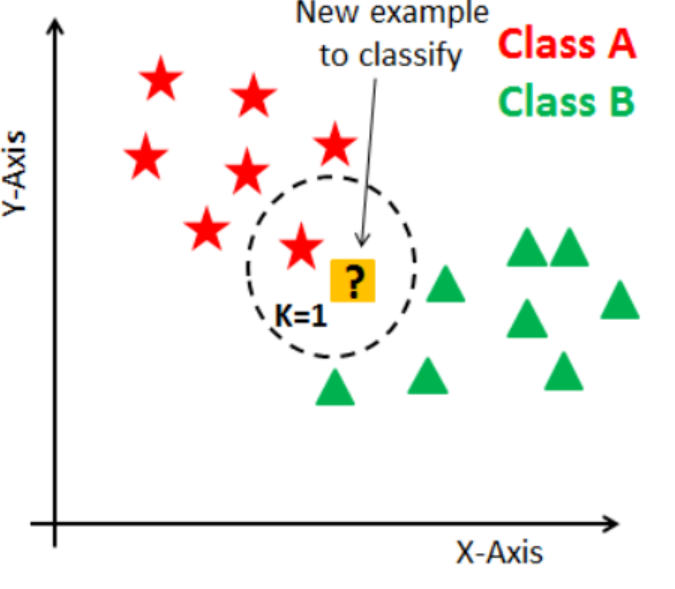

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2, stratify=df_iris['target'])

In [52]:
# 모델 정의
# default K=5
model = KNeighborsClassifier()

In [53]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
prediction = model.predict(x_valid)

In [55]:
(prediction==y_valid).mean()

0.9666666666666667

K=7이면

In [56]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction==y_valid).mean()

0.9666666666666667

K=3이면

In [66]:
# iris데이터셋의 경우 n_neighbors값이 높을 수록 정확한 편이다.
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction==y_valid).mean()

1.0

### 서포트 벡터 머신 (SVC)

> 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.  
> 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

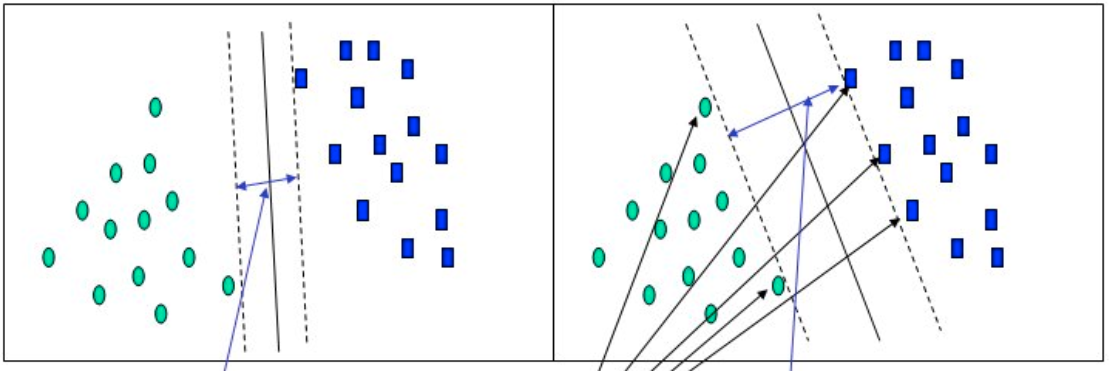Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [67]:
from sklearn.svm import SVC

In [68]:
model = SVC(random_state=123)

In [69]:
model.fit(x_train, y_train)

SVC(random_state=123)

In [71]:
prediction = model.predict(x_valid)

In [73]:
(prediction==y_valid).mean()

1.0

### 의사 결정 트리(Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

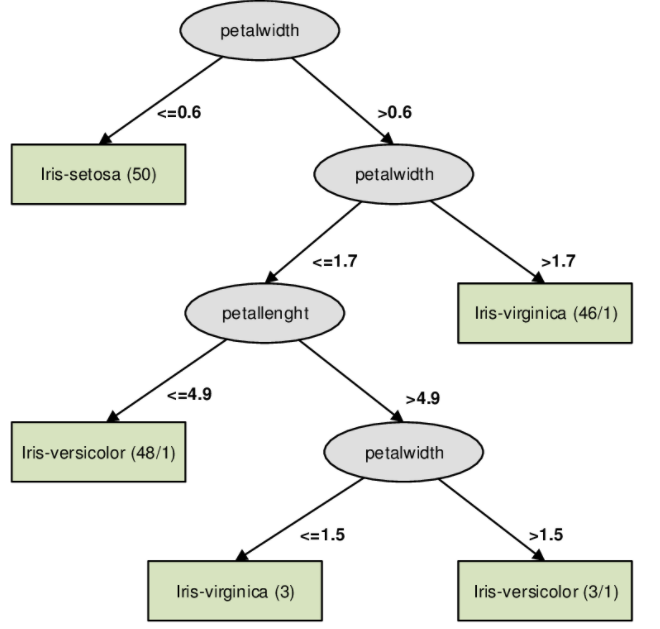Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [98]:
model = DecisionTreeClassifier(random_state=0)

In [99]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [100]:
prediction = model.predict(x_valid)

In [101]:
(prediction==y_valid).mean()

0.9666666666666667

[Text(297.6, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(223.20000000000002, 489.24, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(372.0, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(297.6, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(148.8, 271.8, 'X[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(74.4, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(223.20000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.40000000000003, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(372.0, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(520.8000000000001, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(446.40000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(595.2

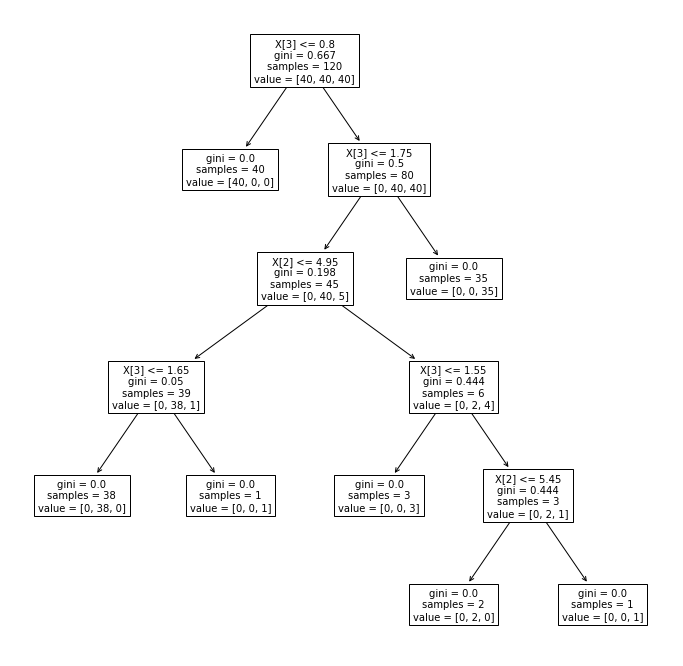

In [112]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)